## INTRODUCTION
The main aim of this project to acces and test in details the wrangling effort while carrying out any Data Analysis on tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The three aspects of Data Wrangling will be discussed detailedly. The wrangled data will be stored and explored to draw insights.

## DATA WRANGLING

### In this section, 3 underlisted parts of data wrangling will be explained deeply in details

#### - Gathering
#### - Accessment
#### - Cleaning

## Data Gathering

In this section, 3 separate Data are gathered from different source using different method,

1. By reading a csv file provided
2. By downloading another file from URL link programmatically
3. By querying twitter API to gather a user tweet features like tweet_ids, rating, favorite count and so on, then write to a json file before reading to panda DataFrame

In [525]:
#import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

#### Reading twitter-archive-enhanced.csv file

In [416]:
#read the csv file
df = pd.read_csv('twitter-archive-enhanced.csv')

In [417]:
#check few elements of the file 
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Downloading image_prediction file

In [529]:
#download the image_prediction file url programatically

folder_name = 'image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

#image_pred = pd.read_table(url, sep='\t')

In [530]:
#check few elements from image_pred file
image_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Querrying the Tweet API

In [420]:
#import the necessary libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [421]:
#set df_1 to twitter-archive-enhanced.csv file
df_1 = df

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
#failuure to retrieve the information, then store the ids here
fails_dict = {}
#start timer
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 647


Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success
933: 754011816964026368
Fail
934

Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
1184: 718939241951195136
Success
11

Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
1433: 697482927769255936
Success
14

Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
1682: 681981167097122816
Success
16

Rate limit reached. Sleeping for: 627


Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [422]:
### create a list file to append the data into
df_list = []

#read the json file already written
with open('tweet_json.txt', 'r') as tweet_data:
    for line in tweet_data:
        data = json.loads(line)
        tweets = {'tweet_id': data['id'],
                  'time_created' : data['created_at'],
                  #i notice each tweet contains url link in the json file
                  #thats why i have to split and the actual length of the tweet
                  #without the url link
                  'tweet_length': len(data['full_text'].split(' http')[0]),
                  #i did the same for source
                  'source' : data['source'].split('>')[1].split('<')[0],
                 'retweet_count': data['retweet_count'],
                 'favorite_count': data['favorite_count']}
        df_list.append(tweets)

#create a DataFrame with the above attributes
df_tweets = pd.DataFrame(df_list, columns= ['tweet_id', 
                                            'time_created', 
                                            'tweet_length',
                                            'source', 
                                            'retweet_count', 
                                            'favorite_count'])

In [423]:
df_tweets.head(5)

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152


## Data Accessment

Here, the already gathered Data will be access visually and programatically to get acquainted with out Datasets and to derived any issue comprised in the Data for easy fixing when cleaning. However, the result from this accessment will be documented for reference sake. 

#### Visual Accessment
Each dataset will be accessed vissually to pick quality and tidiness issue.

In [424]:
#display df for visual accessment
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [425]:
#display image_pred for visual accessment
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [426]:
#display df_tweets for visual accessment
df_tweets

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152
...,...,...,...,...,...,...
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,96,Twitter for iPhone,36,88
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,113,Twitter for iPhone,115,245
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,106,Twitter for iPhone,36,100
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,115,Twitter for iPhone,39,112


## Programmatic Accessment
Here the Datasets will be inspected programmatically to derive what needs to be fix that cannot be detected during visuall accessment.

### df Table

In [427]:
#check info about the df dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [428]:
#check the shape of df dataset
df.shape

(2356, 17)

In [429]:
#check for number of null values in df Dataset
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [430]:
#check for no stage dog
df[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
1309,None,None,None,None
1137,None,None,None,None
1587,None,None,None,None
2144,None,None,None,None
1828,None,None,pupper,None
300,doggo,None,None,None
1061,None,None,None,None
618,None,None,None,None
1683,None,None,pupper,None
803,None,None,None,None


In [431]:
df[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [432]:
#check for unique stages in each stage column
df.doggo.unique(), df.floofer.unique(), df.pupper.unique(), df.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [433]:
#check for dog with multiple stages 
df[['doggo','floofer','pupper','puppo']].sum(axis=1).value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
dtype: int64

#### The code above shows there are some dogs with more than one assigned dog stage like doggo and floofer together

In [434]:
#check for duplicates in df Dataset
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [435]:
#check for the entities in name column of df Dataset
df.name.sample(5)

843       None
1107    Livvie
243       None
2023      Lola
2189      None
Name: name, dtype: object

In [436]:
#wrong dog names
df[df.name.str.lower() == df.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [437]:
#check for the maximum rating numerator
df.rating_numerator.max()

1776

In [438]:
#check for the minimun rating numerator
df.rating_numerator.min()

0

In [439]:
df.rating_denominator.value_counts().head()

10    2333
11       3
50       3
20       2
80       2
Name: rating_denominator, dtype: int64

In [440]:
#check for the maximum rating denominator
df.rating_denominator.max()

170

In [441]:
#check for the minimun rating denominator
df.rating_denominator.min()

0

In [442]:
#check df description for statistical references numerical columns
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### image_pred Table

In [443]:
#check for samples in image_pred
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
1918,855459453768019968,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True
504,675888385639251968,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,1,West_Highland_white_terrier,0.672117,True,Old_English_sheepdog,0.146147,True,komondor,0.023141,True
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,0.997121,False,seat_belt,0.000375,False,beagle,0.000216,True
1047,713177543487135744,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,1,whippet,0.734244,True,basenji,0.025948,True,Great_Dane,0.025874,True
1734,821522889702862852,https://pbs.twimg.com/media/C2aitIUXAAAG-Wi.jpg,1,Doberman,0.763539,True,black-and-tan_coonhound,0.136602,True,miniature_pinscher,0.087654,True
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False


In [444]:
#check info for image_pred dataset
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [445]:
#check image_pred numerical columns description
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### df_tweets Table

In [446]:
df_tweets.head(5)

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152


In [447]:
#check info for df_tweets dataset
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   time_created    2327 non-null   object
 2   tweet_length    2327 non-null   int64 
 3   source          2327 non-null   object
 4   retweet_count   2327 non-null   int64 
 5   favorite_count  2327 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 109.2+ KB


In [448]:
#check for shape
df_tweets.shape

(2327, 6)

In [449]:
#check for entities in source
df_tweets.source.value_counts()

Twitter for iPhone     2193
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [450]:
#check for description of the numberical columns 
df_tweets.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,2327.0,7.417930e+17,6.820795e+16,6.660209e+17,6.781394e+17,7.178418e+17,7.986547e+17,8.924206e+17
tweet_length,2327.0,9.759347e+01,2.706360e+01,1.100000e+01,8.000000e+01,1.070000e+02,1.150000e+02,1.650000e+02
retweet_count,2327.0,2.459519e+03,4.165117e+03,1.000000e+00,4.925000e+02,1.144000e+03,2.845500e+03,7.035600e+04
favorite_count,2327.0,7.024959e+03,1.091514e+04,0.000000e+00,1.221000e+03,3.039000e+03,8.563500e+03,1.442130e+05


In [451]:
#check for duplicated column programmatically
all_columns = pd.Series(list(df) + list(image_pred) + list(df_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
32      source
dtype: object


## Accessment Documentatition 
After accessing the datasets both visually and programmatically, below are the issue derived and will be taken into account in the data cleaning process

### Quality 
- tweet_id column in integer Datatype, also on image_pred Dataset and df-tweets Dataset
- timestamp column has wrong datatype, also time_created column in df_tweets Dataset
- inconsistency in rating denominator in df_dataset
- Irrelevance and composition of to many null vales in the underlisted columns of df datasaet
    - text
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - expanded_urls
    - Timestamp and source columns are present in both df and df_tweet datasets
  
- Some names are wrong in df dataset
- Some dogs have None stage in df dataset 
- Multiple Dog stages
- dog breeds and level of confidence in different columns in image_pred dataset

### Tidiness
- Dog stage in df has 4 columns 
- 3 separate files

## Data Cleaning
here, the datasets will be cleaned to fix all the issues dervided when visually and programmatically accessing the datasets. Each issue will be attended to separately using the Define, Code and Test methods. before that, a copy of all the dataset will be created.

In [452]:
#make a copy of all the datasets
df_copy = df.copy()
image_pred_copy = image_pred.copy()
df_tweets_copy = df_tweets.copy()

### `df dataset`, `image_pred dataset`, `df_tweets dataset`: tweet_id column in integer Datatype 

##### Define

Convert to string datatype

##### Code

In [453]:
df_copy['tweet_id'] = pd.Series(df_copy['tweet_id'], dtype="string")
image_pred_copy['tweet_id'] = pd.Series(df_copy['tweet_id'], dtype="string")
df_tweets_copy['tweet_id'] = pd.Series(df_copy['tweet_id'], dtype="string")

##### Test

In [454]:
df_copy['tweet_id'].dtypes

StringDtype

In [455]:
image_pred_copy['tweet_id'].dtypes

StringDtype

In [456]:
df_tweets_copy['tweet_id'].dtypes

StringDtype

### `df dataset`, `df_tweets dataset`: - timestamp and time_created columns has wrong datatype

##### Define

Convert to standard time-date datatype

##### Code

In [457]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

In [458]:
df_tweets_copy['timestamp'] = pd.to_datetime(df_tweets_copy['time_created'])

#####  Test

In [459]:
df_copy['timestamp'].dtypes

datetime64[ns, UTC]

In [460]:
df_tweets_copy['timestamp'].dtypes

datetime64[ns, UTC]

### `df dataset`: - inconsistency in rating denominator

##### Define

correct by setting the values other than or less than 10 to 10

##### Code

In [461]:
#check the ranges of the rating denominator
df_copy.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [462]:
#set all denominators to 10
df_copy['rating_denominator'].replace([df_copy.rating_numerator.values], 10)

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

##### Test

In [463]:
df_copy.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

### `df dataset`: - Irrelevance and composition of to many null vales in the underlisted columns of df datasaet
    - text
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
    - expanded_urls
    - timestamp 
    - source 

##### Define

- Drop the columns
- Drop also the rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

##### Code

In [464]:
#drop column-wise
df_copy.drop(['text', 
              'in_reply_to_status_id',
              'in_reply_to_user_id',
              'expanded_urls',
              'timestamp',
              'source'], axis=1, inplace=True)

In [465]:
df_copy.head()

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,NaN,12,10,Franklin,None,None,None,None


In [466]:
df_copy[df_copy['retweeted_status_id'].notnull()]

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,13,10,Canela,None,None,None,None
32,886054160059072513,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,12,10,None,None,None,None,None
36,885311592912609280,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,13,10,Lilly,None,None,None,None
68,879130579576475649,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,14,10,Emmy,None,None,None,None
73,878404777348136964,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,10,10,Shaggy,None,None,None,None
1043,743835915802583040,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,10,10,None,None,None,None,None
1242,711998809858043904,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,12,10,None,None,None,None,None
2259,667550904950915073,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,12,10,None,None,None,None,None


In [467]:
df_copy[df_copy['retweeted_status_user_id'].notnull()]

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,13,10,Canela,None,None,None,None
32,886054160059072513,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,12,10,None,None,None,None,None
36,885311592912609280,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,13,10,Lilly,None,None,None,None
68,879130579576475649,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,14,10,Emmy,None,None,None,None
73,878404777348136964,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,10,10,Shaggy,None,None,None,None
1043,743835915802583040,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,10,10,None,None,None,None,None
1242,711998809858043904,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,12,10,None,None,None,None,None
2259,667550904950915073,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,12,10,None,None,None,None,None


In [468]:
df_copy[df_copy['retweeted_status_timestamp'].notnull()]

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,13,10,Canela,None,None,None,None
32,886054160059072513,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,12,10,None,None,None,None,None
36,885311592912609280,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,13,10,Lilly,None,None,None,None
68,879130579576475649,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,14,10,Emmy,None,None,None,None
73,878404777348136964,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,10,10,Shaggy,None,None,None,None
1043,743835915802583040,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,10,10,None,None,None,None,None
1242,711998809858043904,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,12,10,None,None,None,None,None
2259,667550904950915073,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,12,10,None,None,None,None,None


In [469]:
#drop all row-wise
df_copy.drop(df_copy[df_copy['retweeted_status_id'].notnull()].index[:], axis=0, inplace=True)
df_copy.drop(df_copy[df_copy['retweeted_status_user_id'].notnull()].index[:], axis=0, inplace=True)
df_copy.drop(df_copy[df_copy['retweeted_status_timestamp'].notnull()].index[:], axis=0, inplace=True)

In [470]:
#now drop the columns
df_copy.drop(['retweeted_status_id', 
              'retweeted_status_user_id',
              'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [471]:
df.shape, df_copy.shape

((2356, 17), (2175, 8))

#### The columns have reduced to 8. Also, the rows to 2175

### `df dataset`: - Some names are wrong

##### Define

Convert the wrong names 'none' which means no name

##### Code

In [472]:
df_copy.name.sample(5)

674      Brownie
2099        None
1889    Superpup
1091        None
807         None
Name: name, dtype: object

In [473]:
#fill the wrong names with 'None'
df_copy['name'] = df_copy['name'].apply(lambda z: z if str(z).lower() != z else 'None')

###### Test

In [474]:
df_copy.sample(5)

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1621,684926975086034944,11,10,Bruiser,None,None,None,None
1888,674781762103414784,8,10,None,None,None,None,None
430,821044531881721856,12,10,Flash,None,None,None,None
151,862831371563274240,13,10,Zooey,None,None,None,None
464,817415592588222464,11,10,Strudel,None,None,None,None


In [475]:
df_copy[df_copy.name.str.lower() == df_copy.name].name.unique()

array([], dtype=object)

### `df dataset`: - Dog stage in df has 4 columns

##### Define

- Group Dog stages into one features called dog_stage
- Name dogs with no assigned stage, as 'None'
- Drop columns with dog stages as column names
- Set dogs with multiple stages, to 'multiple'

##### Code

In [476]:
df_copy.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [477]:
#group the stages in one column
df_copy['dog_stage'] = df.doggo + df.floofer + df.pupper + df.puppo

In [478]:
df_copy

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,13,10,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,13,10,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,12,10,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,13,10,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,12,10,Franklin,None,None,None,None,NoneNoneNoneNone
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,5,10,None,None,None,None,None,NoneNoneNoneNone
2352,666044226329800704,6,10,None,None,None,None,None,NoneNoneNoneNone
2353,666033412701032449,9,10,None,None,None,None,None,NoneNoneNoneNone
2354,666029285002620928,7,10,None,None,None,None,None,NoneNoneNoneNone


In [479]:
#check for null values
df_copy['dog_stage'].isna().sum()

0

In [480]:
#check for the unique vales
df_copy['dog_stage'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [481]:
#rename the dog_stage column accordingly
df_copy['dog_stage'].replace('NoneNoneNoneNone', 'None', inplace=True)
df_copy['dog_stage'].replace('doggoNoneNoneNone', 'doggo', inplace=True)
df_copy['dog_stage'].replace('NoneNoneNonepuppo', 'puppo', inplace=True)
df_copy['dog_stage'].replace('NoneNonepupperNone', 'pupper', inplace=True)
df_copy['dog_stage'].replace('NoneflooferNoneNone', 'floofer', inplace=True)
df_copy['dog_stage'].replace('doggoNoneNonepuppo', 'multiple', inplace=True)
df_copy['dog_stage'].replace('doggoflooferNoneNone', 'multiple', inplace=True)
df_copy['dog_stage'].replace('doggoNonepupperNone', 'multiple', inplace=True)

In [482]:
#drop the ['doggo', 'floofer', 'pupper', 'puppo'] columns
df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [483]:
df_copy['dog_stage'].value_counts()

None        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

In [484]:
df_copy.dog_stage.value_counts()
print('Total number of Dogs with no assigned stage: ',  df_copy.dog_stage.value_counts().values[0])
print('Total number of Dogs with multiple dog stages:',  df_copy.dog_stage.value_counts().values[4])
print('Total number of Dogs with assigned as pupper: ',  df_copy.dog_stage.value_counts().values[1])
print('Total number of Dogs with assigned as doggo:  ',  df_copy.dog_stage.value_counts().values[2])
print('Total number of Dogs with assigned as puppo:  ',  df_copy.dog_stage.value_counts().values[3])
print('Total number of Dogs with assigned as floofer:',  df_copy.dog_stage.value_counts().values[5])

Total number of Dogs with no assigned stage:  1831
Total number of Dogs with multiple dog stages: 12
Total number of Dogs with assigned as pupper:  224
Total number of Dogs with assigned as doggo:   75
Total number of Dogs with assigned as puppo:   24
Total number of Dogs with assigned as floofer: 9


### `df dataset`: - Dog breeds and level of confidence in different columns in image_pred dataset

##### Define

- Create a new column 'confidence' to select the highest level of confidence
- Set a new column 'breed' to assign the dog breed with that highest confidence level
- Set Breed to 'None' and Confidence to 0 where all the predictions are False

##### Code

In [485]:
#setup selection condition
conditions = [(image_pred_copy['p1_dog'] == True),
              (image_pred_copy['p2_dog'] == True),
              (image_pred_copy['p3_dog'] == True)]

#setup predicted breed name order based on condition
name_order = [image_pred_copy['p1'],
         image_pred_copy['p2'],
         image_pred_copy['p3']]

#setup confidence level based on selection condition
confidence = [image_pred_copy['p1_conf'],
              image_pred_copy['p2_conf'],
              image_pred_copy['p3_conf']]

#select predicted breed based on the first successful condition
image_pred_copy['breed'] = np.select(conditions, name_order, default = 'none')

#select predicted level of confidence based on the first successful condition
image_pred_copy['confidence'] = np.select(conditions, confidence, default = 0)

In [486]:
image_pred_copy.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,891815181378084864,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,891689557279858688,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,891327558926688256,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [487]:
#drop other columns except [tweet_id, breed and confidence] columns
image_pred_copy.drop(['jpg_url',
                      'img_num',
                     'p1',
                     'p1_conf',
                     'p1_dog',
                     'p2',
                     'p2_conf',
                     'p2_dog',
                     'p3',
                     'p3_conf',
                      'p3_dog'], axis=1, inplace=True)

##### Test

In [488]:
image_pred_copy

,tweet_id,breed,confidence
0,892420643555336193,Welsh_springer_spaniel,0.465074
1,892177421306343426,redbone,0.506826
2,891815181378084864,German_shepherd,0.596461
3,891689557279858688,Rhodesian_ridgeback,0.408143
4,891327558926688256,miniature_pinscher,0.560311
...,...,...,...
2070,671122204919246848,basset,0.555712
2071,671115716440031232,Labrador_retriever,0.168086
2072,671109016219725825,Chihuahua,0.716012
2073,670995969505435648,Chihuahua,0.323581


In [489]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   string 
 1   breed       2075 non-null   object 
 2   confidence  2075 non-null   float64
dtypes: float64(1), object(1), string(1)
memory usage: 48.8+ KB


### Print the 3 wrangled data

In [490]:
df_copy.head(5)

,tweet_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,13,10,Phineas,None
1,892177421306343426,13,10,Tilly,None
2,891815181378084864,12,10,Archie,None
3,891689557279858688,13,10,Darla,None
4,891327558926688256,12,10,Franklin,None


In [491]:
image_pred_copy.head()

,tweet_id,breed,confidence
0,892420643555336193,Welsh_springer_spaniel,0.465074
1,892177421306343426,redbone,0.506826
2,891815181378084864,German_shepherd,0.596461
3,891689557279858688,Rhodesian_ridgeback,0.408143
4,891327558926688256,miniature_pinscher,0.560311


In [492]:
df_tweets_copy.head()

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count,timestamp
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691,2017-08-01 16:23:56+00:00
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217,2017-08-01 00:17:27+00:00
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979,2017-07-31 00:18:03+00:00
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766,2017-07-30 15:58:51+00:00
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152,2017-07-29 16:00:24+00:00


### Create and Store Master Dataset

Since all the data are now tidy, they can now be merged on tweet_id column to form a new master Dataset

In [493]:
#create a master dataframe called df_master
df_master = df_tweets_copy.merge(df_copy, on='tweet_id', how='inner').merge(image_pred_copy, on='tweet_id', how='inner')

In [494]:
df_master

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_stage,breed,confidence
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691,2017-08-01 16:23:56+00:00,13,10,Phineas,None,Welsh_springer_spaniel,0.465074
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217,2017-08-01 00:17:27+00:00,13,10,Tilly,None,redbone,0.506826
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979,2017-07-31 00:18:03+00:00,12,10,Archie,None,German_shepherd,0.596461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766,2017-07-30 15:58:51+00:00,13,10,Darla,None,Rhodesian_ridgeback,0.408143
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152,2017-07-29 16:00:24+00:00,12,10,Franklin,None,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,671122204919246848,Sat Nov 28 21:34:09 +0000 2015,71,Twitter for iPhone,416,1051,2015-11-28 21:34:09+00:00,4,10,None,None,basset,0.555712
1892,671115716440031232,Sat Nov 28 20:43:53 +0000 2015,111,Twitter for iPhone,317,686,2015-11-28 20:43:53+00:00,6,10,Phred,None,Labrador_retriever,0.168086
1893,671109016219725825,Sat Nov 28 19:51:59 +0000 2015,99,Twitter for iPhone,208,516,2015-11-28 19:51:59+00:00,8,10,Toby,None,Chihuahua,0.716012
1894,670995969505435648,Sat Nov 28 19:04:19 +0000 2015,115,Twitter for iPhone,240,663,2015-11-28 19:04:19+00:00,12,10,None,None,Chihuahua,0.323581


In [495]:
#store the dataframe as twitter_archive_master
df_master.to_csv('twitter_archive_master.csv', index=False)

df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1896 non-null   string             
 1   time_created        1896 non-null   object             
 2   tweet_length        1896 non-null   int64              
 3   source              1896 non-null   object             
 4   retweet_count       1896 non-null   int64              
 5   favorite_count      1896 non-null   int64              
 6   timestamp           1896 non-null   datetime64[ns, UTC]
 7   rating_numerator    1896 non-null   int64              
 8   rating_denominator  1896 non-null   int64              
 9   name                1896 non-null   object             
 10  dog_stage           1896 non-null   object             
 11  breed               1896 non-null   object             
 12  confidence          1896 non-null 

### Exploratory Data Analysis
The already wrangle and stored file will be read and explored to extract insights from this twitter_archive_master dataset, a bit of feature engineering will applied where needed. I will also like to pose certain questions which will be listed below which will serve as guide while we proceed.

#### Features Engineering
- Get Day, Month, and year to separate columns
- Get rating as rating numerator divided by rating denominator

#### Research Questions
- What is the average tweet length
- 10 Most and least common bread
- 5 Most common Dog names
- Highest source of tweet
- On what day of the week, does the user tweet mostly
- Relationship between the following underlisted numerical columns
    - tweet_length
    - retweet_count
    - favorite_count
    - rating

In [496]:
df_master['breed'].nunique()

113

In [497]:
#read the stored data as df_master
df_master = pd.read_csv('twitter_archive_master.csv')
df_master

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_stage,breed,confidence
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691,2017-08-01 16:23:56+00:00,13,10,Phineas,None,Welsh_springer_spaniel,0.465074
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217,2017-08-01 00:17:27+00:00,13,10,Tilly,None,redbone,0.506826
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979,2017-07-31 00:18:03+00:00,12,10,Archie,None,German_shepherd,0.596461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766,2017-07-30 15:58:51+00:00,13,10,Darla,None,Rhodesian_ridgeback,0.408143
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152,2017-07-29 16:00:24+00:00,12,10,Franklin,None,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,671122204919246848,Sat Nov 28 21:34:09 +0000 2015,71,Twitter for iPhone,416,1051,2015-11-28 21:34:09+00:00,4,10,None,None,basset,0.555712
1892,671115716440031232,Sat Nov 28 20:43:53 +0000 2015,111,Twitter for iPhone,317,686,2015-11-28 20:43:53+00:00,6,10,Phred,None,Labrador_retriever,0.168086
1893,671109016219725825,Sat Nov 28 19:51:59 +0000 2015,99,Twitter for iPhone,208,516,2015-11-28 19:51:59+00:00,8,10,Toby,None,Chihuahua,0.716012
1894,670995969505435648,Sat Nov 28 19:04:19 +0000 2015,115,Twitter for iPhone,240,663,2015-11-28 19:04:19+00:00,12,10,None,None,Chihuahua,0.323581


In [498]:
#get day, month and year to new columns using lambda function

df_master['day'] = df_master['time_created'].apply(lambda x: x.split(' ')[0])
df_master['month'] = df_master['time_created'].apply(lambda x: x.split(' ')[1])
df_master['year'] = df_master['time_created'].apply(lambda x: x.split(' ')[-1])

In [499]:
df_master[['tweet_id','timestamp', 'day', 'month', 'year']]

,tweet_id,timestamp,day,month,year
0,892420643555336193,2017-08-01 16:23:56+00:00,Tue,Aug,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,Tue,Aug,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,Mon,Jul,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,Sun,Jul,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,Sat,Jul,2017
...,...,...,...,...,...
1891,671122204919246848,2015-11-28 21:34:09+00:00,Sat,Nov,2015
1892,671115716440031232,2015-11-28 20:43:53+00:00,Sat,Nov,2015
1893,671109016219725825,2015-11-28 19:51:59+00:00,Sat,Nov,2015
1894,670995969505435648,2015-11-28 19:04:19+00:00,Sat,Nov,2015


In [500]:
#check days value counts
df_master.day.value_counts()

Mon    303
Tue    289
Wed    280
Thu    267
Fri    255
Sat    251
Sun    251
Name: day, dtype: int64

In [501]:
#check months value counts
df_master.month.value_counts()

Dec    446
Jan    268
Feb    193
Mar    189
Jul    144
Jun    141
Apr    107
Nov    104
May    103
Oct     72
Sep     68
Aug     61
Name: month, dtype: int64

In [502]:
#check year value counts
df_master.year.value_counts()

2016    1073
2015     437
2017     386
Name: year, dtype: int64

In [503]:
#calculate rating as new column

df_master['rating'] = df_master['rating_numerator'] / df_master['rating_denominator']

df_master[['tweet_id','rating_numerator', 'rating_denominator', 'rating']]

,tweet_id,rating_numerator,rating_denominator,rating
0,892420643555336193,13,10,1.3
1,892177421306343426,13,10,1.3
2,891815181378084864,12,10,1.2
3,891689557279858688,13,10,1.3
4,891327558926688256,12,10,1.2
...,...,...,...,...
1891,671122204919246848,4,10,0.4
1892,671115716440031232,6,10,0.6
1893,671109016219725825,8,10,0.8
1894,670995969505435648,12,10,1.2


### Research Question 1: What is the average tweet length

In [504]:
#display average tweet lenght

print('The Average Tweet Legnth is ', df_master['tweet_length'].mean())

The Average Tweet Legnth is  96.85601265822785


In [505]:
df_master['tweet_length'].value_counts()

116    149
115    117
113     73
114     59
112     51
      ... 
33       1
24       1
20       1
17       1
165      1
Name: tweet_length, Length: 127, dtype: int64

This means most of each tweet's length revolve aroung this length.

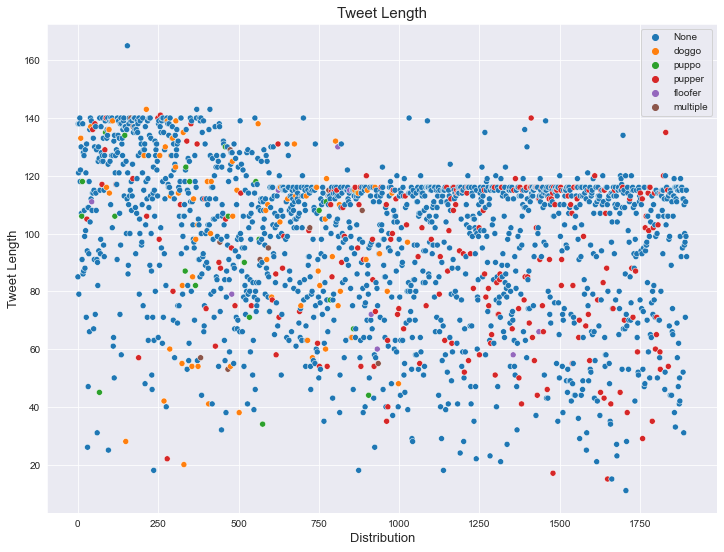

In [506]:
#create canvas size
plt.figure(figsize=(12,9))

#visualize using seaborn scatterplot
sns.scatterplot(x=df_master.index, y=df_master['tweet_length'], hue=df_master['dog_stage'])

#set title and labels
plt.title('Tweet Length', {'fontsize': 15})
plt.ylabel('Tweet Length', {'fontsize': 13})
plt.xlabel('Distribution', {'fontsize': 13})
plt.legend(loc='upper right');

### Research Question 2: 10 Most and Least common Breeds
Here i will like to work on only dogs with assigned breed name and disregard those without name

In [507]:
#check out bree value counts
df_master['breed'].value_counts()

none                    285
golden_retriever        165
Labrador_retriever      102
Chihuahua                88
Pembroke                 85
                       ... 
Scottish_deerhound        1
Bouvier_des_Flandres      1
clumber                   1
Irish_wolfhound           1
Japanese_spaniel          1
Name: breed, Length: 113, dtype: int64

In [508]:
#query the breed column to get dogs with asigned breed name
chart_breed = df_master.query('breed != "none"')
chart_breed.head()

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_stage,breed,confidence,day,month,year,rating
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691,2017-08-01 16:23:56+00:00,13,10,Phineas,None,Welsh_springer_spaniel,0.465074,Tue,Aug,2017,1.3
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217,2017-08-01 00:17:27+00:00,13,10,Tilly,None,redbone,0.506826,Tue,Aug,2017,1.3
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979,2017-07-31 00:18:03+00:00,12,10,Archie,None,German_shepherd,0.596461,Mon,Jul,2017,1.2
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766,2017-07-30 15:58:51+00:00,13,10,Darla,None,Rhodesian_ridgeback,0.408143,Sun,Jul,2017,1.3
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152,2017-07-29 16:00:24+00:00,12,10,Franklin,None,miniature_pinscher,0.560311,Sat,Jul,2017,1.2


In [509]:
chart_breed['breed'].value_counts()

golden_retriever        165
Labrador_retriever      102
Chihuahua                88
Pembroke                 85
pug                      63
                       ... 
Scottish_deerhound        1
Bouvier_des_Flandres      1
clumber                   1
Irish_wolfhound           1
Japanese_spaniel          1
Name: breed, Length: 112, dtype: int64

In [510]:
#grab the highest 10
highest_breed = chart_breed['breed'].value_counts().head(10)
highest_breed

golden_retriever            165
Labrador_retriever          102
Chihuahua                    88
Pembroke                     85
pug                          63
toy_poodle                   50
chow                         47
Samoyed                      42
Pomeranian                   38
Chesapeake_Bay_retriever     31
Name: breed, dtype: int64

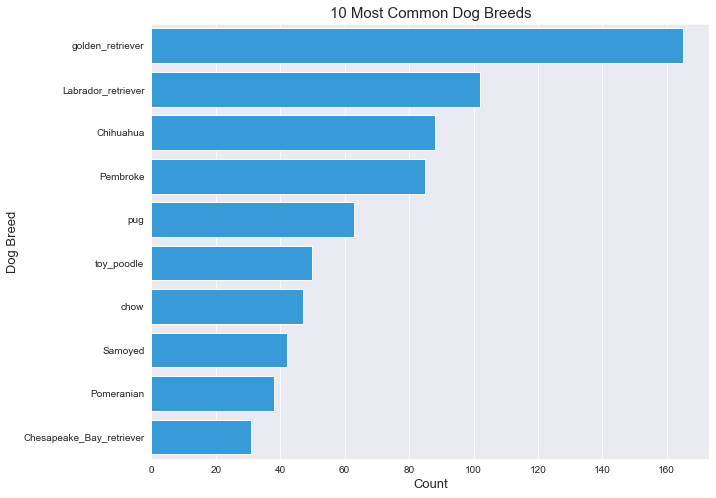

In [511]:
#create canvas size
fig = plt.figure(figsize=(10,8))

#create a barh plot
sns.barplot(x=highest_breed.values,
            y=highest_breed.index,
            color='#1DA1F2',
            orient='h')

#set title and labels
plt.title('10 Most Common Dog Breeds', {'fontsize': 15})
plt.xlabel('Count', {'fontsize': 13})
plt.ylabel('Dog Breed', {'fontsize': 13});

From the above chart, the most common dog breed tweet about is 'GOLDEN RETRIEVER', followed by 'LABRADOR RETRIEVER'

In [512]:
#grab the least 10 common dog breeds
lowest_breed = chart_breed['breed'].value_counts().tail(10)
lowest_breed

curly-coated_retriever    2
Scotch_terrier            1
standard_schnauzer        1
groenendael               1
silky_terrier             1
Scottish_deerhound        1
Bouvier_des_Flandres      1
clumber                   1
Irish_wolfhound           1
Japanese_spaniel          1
Name: breed, dtype: int64

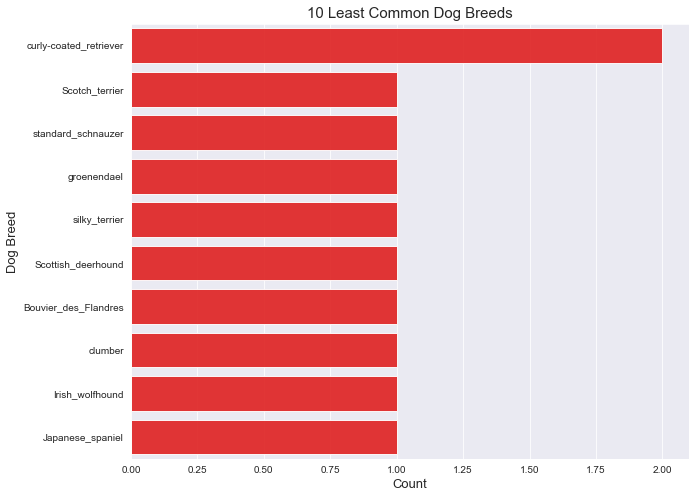

In [513]:
#create canvas size
fig = plt.figure(figsize=(10,8))

#create a barh plot
sns.barplot(x=lowest_breed.values,
            y=lowest_breed.index,
            color='red',
            alpha=0.9,
            orient='h')

#set title and labels
plt.title('10 Least Common Dog Breeds', {'fontsize': 15})
plt.xlabel('Count', {'fontsize': 13})
plt.ylabel('Dog Breed', {'fontsize': 13});

From the above chart, the LEAST common dog breed tweeted about are 

    - STANDARD SCHNAUZER
    - SILKY TERRIER
    - IRISH WOLFHOUND
    - SCOTCH TERRIER
    - CLUMBER
    - BOUVIER DES FLANDRES
    - JAPANESE SPANIEL

### Research Question 3: 5 Most common Dog Names
Here i will like to work on only dogs with assigned name and disregard those without name

In [514]:
df_master['name'].value_counts()

None       655
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Dallas       1
Grey         1
Tedders      1
Lacy         1
Sora         1
Name: name, Length: 831, dtype: int64

In [515]:
#query the name column to get dogs with name
chart_name = df_master.query('name != "None"')
chart_name.head()

,tweet_id,time_created,tweet_length,source,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_stage,breed,confidence,day,month,year,rating
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,85,Twitter for iPhone,6973,33691,2017-08-01 16:23:56+00:00,13,10,Phineas,None,Welsh_springer_spaniel,0.465074,Tue,Aug,2017,1.3
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,138,Twitter for iPhone,5276,29217,2017-08-01 00:17:27+00:00,13,10,Tilly,None,redbone,0.506826,Tue,Aug,2017,1.3
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,121,Twitter for iPhone,3465,21979,2017-07-31 00:18:03+00:00,12,10,Archie,None,German_shepherd,0.596461,Mon,Jul,2017,1.2
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,79,Twitter for iPhone,7185,36766,2017-07-30 15:58:51+00:00,13,10,Darla,None,Rhodesian_ridgeback,0.408143,Sun,Jul,2017,1.3
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,138,Twitter for iPhone,7721,35152,2017-07-29 16:00:24+00:00,12,10,Franklin,None,miniature_pinscher,0.560311,Sat,Jul,2017,1.2


In [516]:
chart_name['name'].value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       8
           ..
Seamus      1
Clarkus     1
Dallas      1
Tedders     1
Duchess     1
Name: name, Length: 830, dtype: int64

In [517]:
#grab most common 5 names
common_name = chart_name['name'].value_counts().head(5)
common_name

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       8
Name: name, dtype: int64

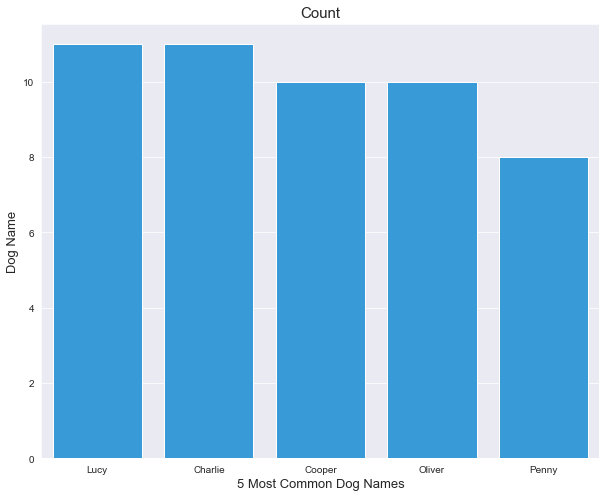

In [518]:
#create canvas size
fig = plt.figure(figsize=(10,8))

#create a barh plot
sns.barplot(x=common_name.index,
            y=common_name.values,
            color='#1DA1F2',)

#set title and labels
plt.title('Count', {'fontsize': 15})
plt.xlabel('5 Most Common Dog Names', {'fontsize': 13})
plt.ylabel('Dog Name', {'fontsize': 13});

The most common Dog Name is LUCY and CHARLIE, followed by COOPER and OLIVER.

### Research Question 4: Distrubution of Tweet Sources

In [519]:
df_master['source'].value_counts()

Twitter for iPhone     1791
Vine - Make a Scene      85
Twitter Web Client       11
TweetDeck                 9
Name: source, dtype: int64

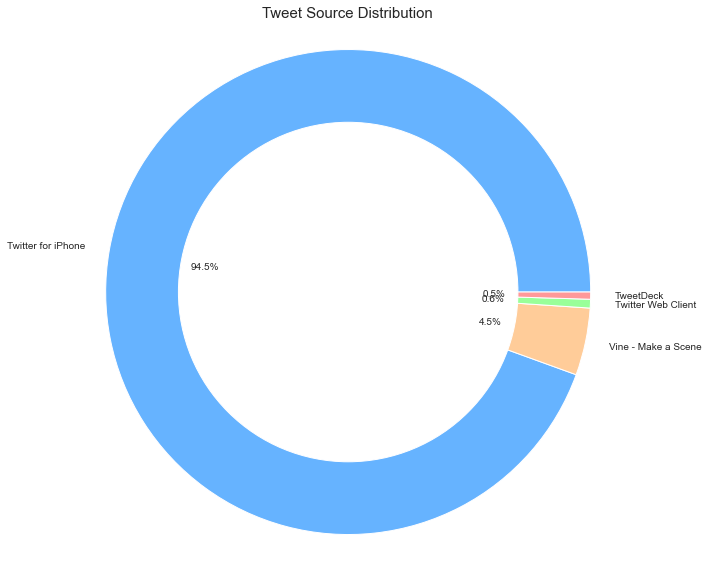

In [520]:
#create canvas size
fig = plt.figure(figsize=(10,8))

#colors
colors = ['#66b3ff','#ffcc99','#99ff99','#ff9999']


plt.pie(df_master['source'].value_counts(),
        colors=colors,
        labels=['Twitter for iPhone','Vine - Make a Scene','Twitter Web Client','TweetDeck'],
        autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#set titles and labels
plt.title('Tweet Source Distribution', {'fontsize': 15})
plt.axis('equal')
plt.tight_layout()

According to the chart above, the most platform used for tweeting by this user is TWITTER FOR iPHONE carrying almost 95% of the whole tweet sources. Followed by VINE - MAKE A SENSE (4.5%) and TWITTER WEB CLIENT (0.6%). The least tweet is TWEET DESK with just 0.5% of the sources.

### Research Question 5: On which day of the week, does the user tweet mostly

In [521]:
day_count = df_master['day'].value_counts()
day_count

Mon    303
Tue    289
Wed    280
Thu    267
Fri    255
Sat    251
Sun    251
Name: day, dtype: int64

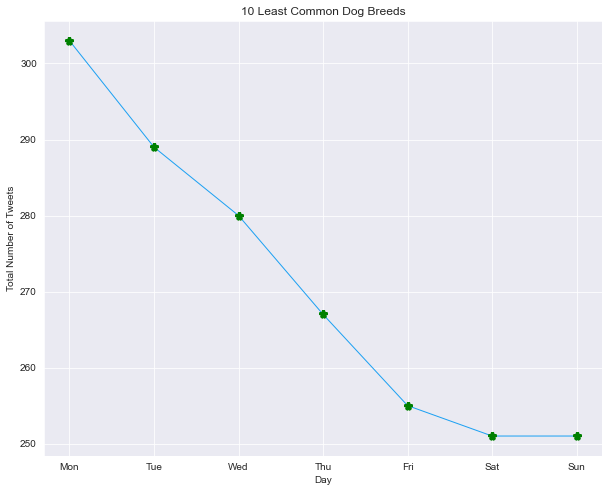

In [522]:
#create canvas size
fig = plt.figure(figsize=(10,8))

#create a barh plot
plt.plot(day_count.index,
         day_count.values,
         color='#1DA1F2',
        lw=1, ls='-', marker='*', markersize=8, 
        markerfacecolor="green", markeredgewidth=3, markeredgecolor="green")
            
#set title and labels
plt.title('10 Least Common Dog Breeds')
plt.xlabel('Day')
plt.ylabel('Total Number of Tweets');

The User tweeted mostly on Monday as it can be shown by thw graph above. And tweet rarely on saturdays and sundays. possibly the user, maximize the meaning of weekend, RESTING.

### Research Question 6: Relationship between the following underlisted numerical columns
    - tweet_length
    - retweet_count
    - favorite_count
    - rating
    
Here, correlation analysis will be employed to check the relationship between these columns

In [523]:
#create a sub_dataset corr containing the columns

cor = df_master[['tweet_length', 'retweet_count', 'favorite_count', 'rating']]

#create correlation table corr
cor_table = cor.corr()

#print cor_table
cor_table

,tweet_length,retweet_count,favorite_count,rating
tweet_length,1.000000,0.055776,0.113575,0.016035
retweet_count,0.055776,1.000000,0.807633,0.003902
favorite_count,0.113575,0.807633,1.000000,0.015565
rating,0.016035,0.003902,0.015565,1.000000


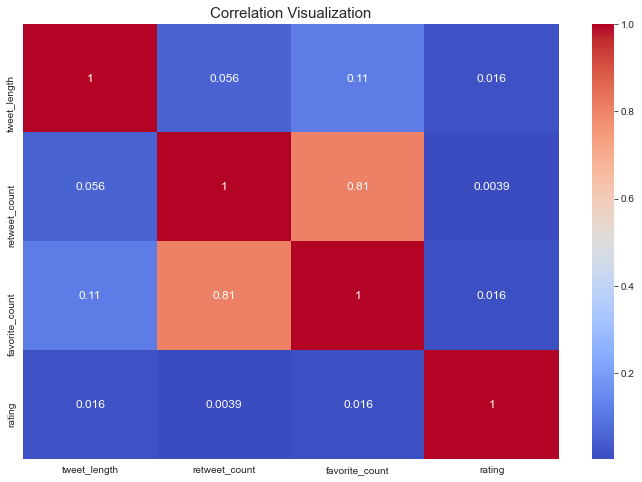

In [524]:
#visualizing the correlation using seaborn Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cor_table, cmap='coolwarm', annot=True, annot_kws = { 'fontsize' : 12 })
plt.title('Correlation Visualization', {'fontsize' : 15 });

After plotting the correlation betweet the posed numerical table, the following is deduced. Although, all have positive correlations but one is weaker than the other

- tweet_length has very weak positive correlation to retweet_count
- tweet_length has weak positive correlation to favorite_count
- tweet_length has very weak positive correlation to rating
- retweet_count has very high positive correlation to favorite_count
- retweet_count has very weak positive correlation to rating
- favorite_count has very weak positve correlation to rating